# Лабораторная работа №2

- ФИО: Ржевская Ольга Евгеньевна
- Группа БИВТ-21-2

# 1.Датасет JobSurveyIndia

# 2.Провести разведочный анализ данных на примере датасета JobSurveyIndia


### **Датасет содержит колонки, каждая из которых:**
- Employment Sector: Сектор в котором сотрудник хотел бы работать.
- Employment Background: Прошлая сфера работы сотрудника.
- Public Dealing: Будет ли публичная деятельность проблемой для сотрудника.
- Degree: Будет ли образование необходимо для идеального места работы сотрудника.
- IdealNumberOfWorkdays: Идеальное количество рабочих дней в неделю.
- IdealYearlyIncome: Идеальная зарплата за год.

### Целевой переменной будет выбран параметр IdealYearlyIncome, который означает какой будет идеальная зарплата за год

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('JobSurveyIndia.csv')
data.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             400 non-null    int64  
 1   Employment Sector      400 non-null    object 
 2   Employment Background  400 non-null    object 
 3   Public Dealing         400 non-null    object 
 4   Degree                 400 non-null    object 
 5   IdealNumberOfWorkdays  400 non-null    float64
 6   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.0+ KB


In [4]:
data.shape

(400, 7)

In [5]:
data.describe()

,Unnamed: 0,IdealNumberOfWorkdays
count,400.000000,400.000000
mean,199.500000,4.902500
std,115.614301,0.805989
min,0.000000,4.000000
25%,99.750000,4.000000
50%,199.500000,5.000000
75%,299.250000,5.000000
max,399.000000,7.000000


In [6]:
X = data.loc[:, data.columns != 'IdealYearlyIncome']
X.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays
0,0,Private Sector,Technical,No,Yes,4.0
1,1,Private Sector,Art,No,Yes,4.0
2,2,Government Sector,Technical,No,Yes,6.0
3,3,Government Sector,Non-Technical,Yes,Yes,4.0
4,4,Private Sector,Technical,No,Yes,5.0


In [7]:
y = data.loc[:,'IdealYearlyIncome']
y.head()

0    More Than 1500K
1          600K-900K
2         900K-1200K
3         900K-1200K
4        1200K-1500K
Name: IdealYearlyIncome, dtype: object

# 3. Построение распределения целевой переменной в виде гистограммы

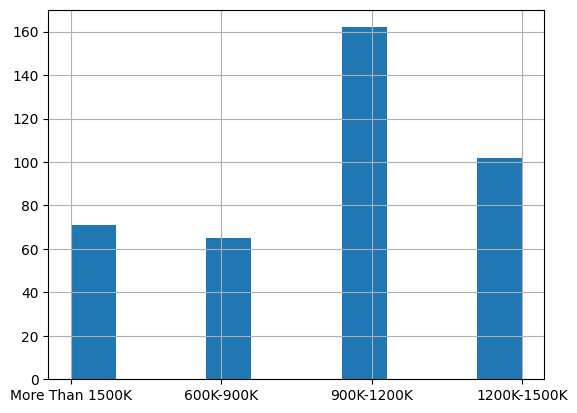

In [8]:
y.hist();

In [9]:
print('Уникальных значений целевой переменной - ', len(set(y)))

Уникальных значений целевой переменной -  4


# 4. Основные статистики по переменным

In [10]:
X.describe()

,Unnamed: 0,IdealNumberOfWorkdays
count,400.000000,400.000000
mean,199.500000,4.902500
std,115.614301,0.805989
min,0.000000,4.000000
25%,99.750000,4.000000
50%,199.500000,5.000000
75%,299.250000,5.000000
max,399.000000,7.000000


In [11]:
y.describe()

count            400
unique             4
top       900K-1200K
freq             162
Name: IdealYearlyIncome, dtype: object

# 5. Основная информация по датасету

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             400 non-null    int64  
 1   Employment Sector      400 non-null    object 
 2   Employment Background  400 non-null    object 
 3   Public Dealing         400 non-null    object 
 4   Degree                 400 non-null    object 
 5   IdealNumberOfWorkdays  400 non-null    float64
 6   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.0+ KB


# 6. Количество пропусков в колонках

In [13]:
data.isnull().sum()

Unnamed: 0               0
Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64

Нам повезло - пропущенных значений не обнаружено. Но если были бы то можно заменить их медианой по всем значениям

# 7. Построение 5-ти любых гистограм множества X

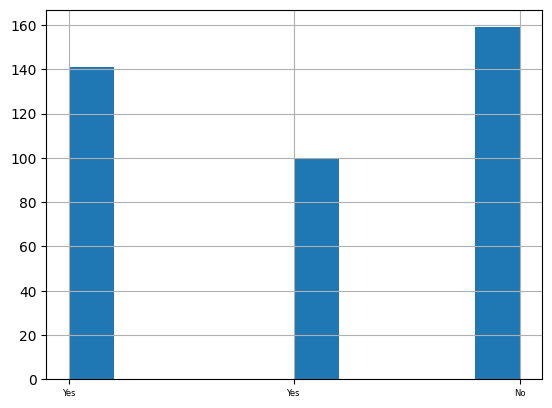

In [14]:
X['Degree'].hist(xlabelsize=6);

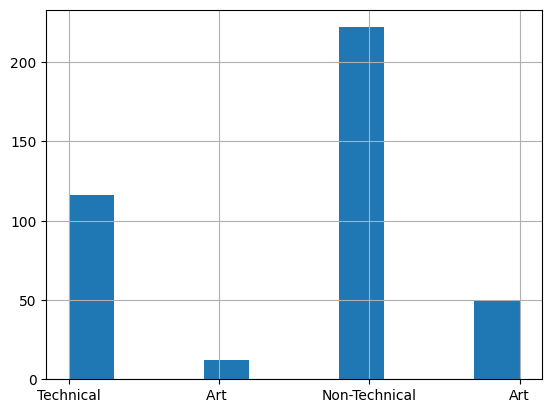

In [15]:
X['Employment Background'].hist();

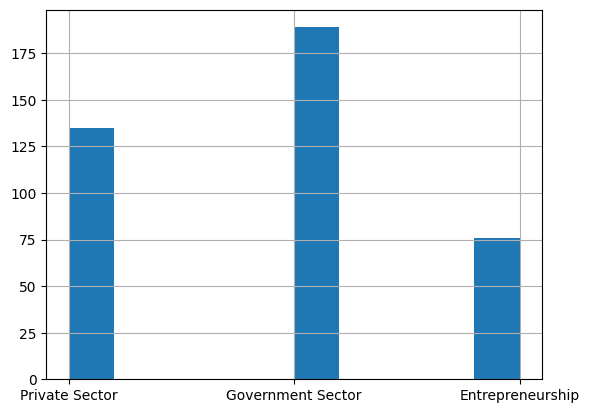

In [16]:
X['Employment Sector'].hist();

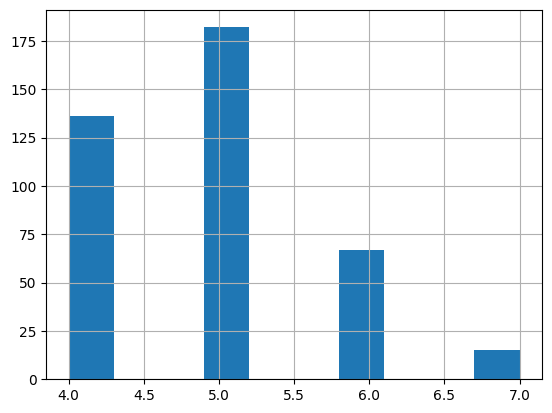

In [17]:
X['IdealNumberOfWorkdays'].hist();

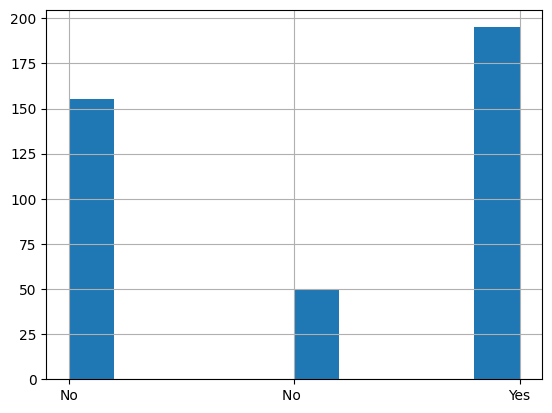

In [18]:
X['Public Dealing'].hist();

# 8. Графики зависимости 5 случайных переменных от целевой переменной

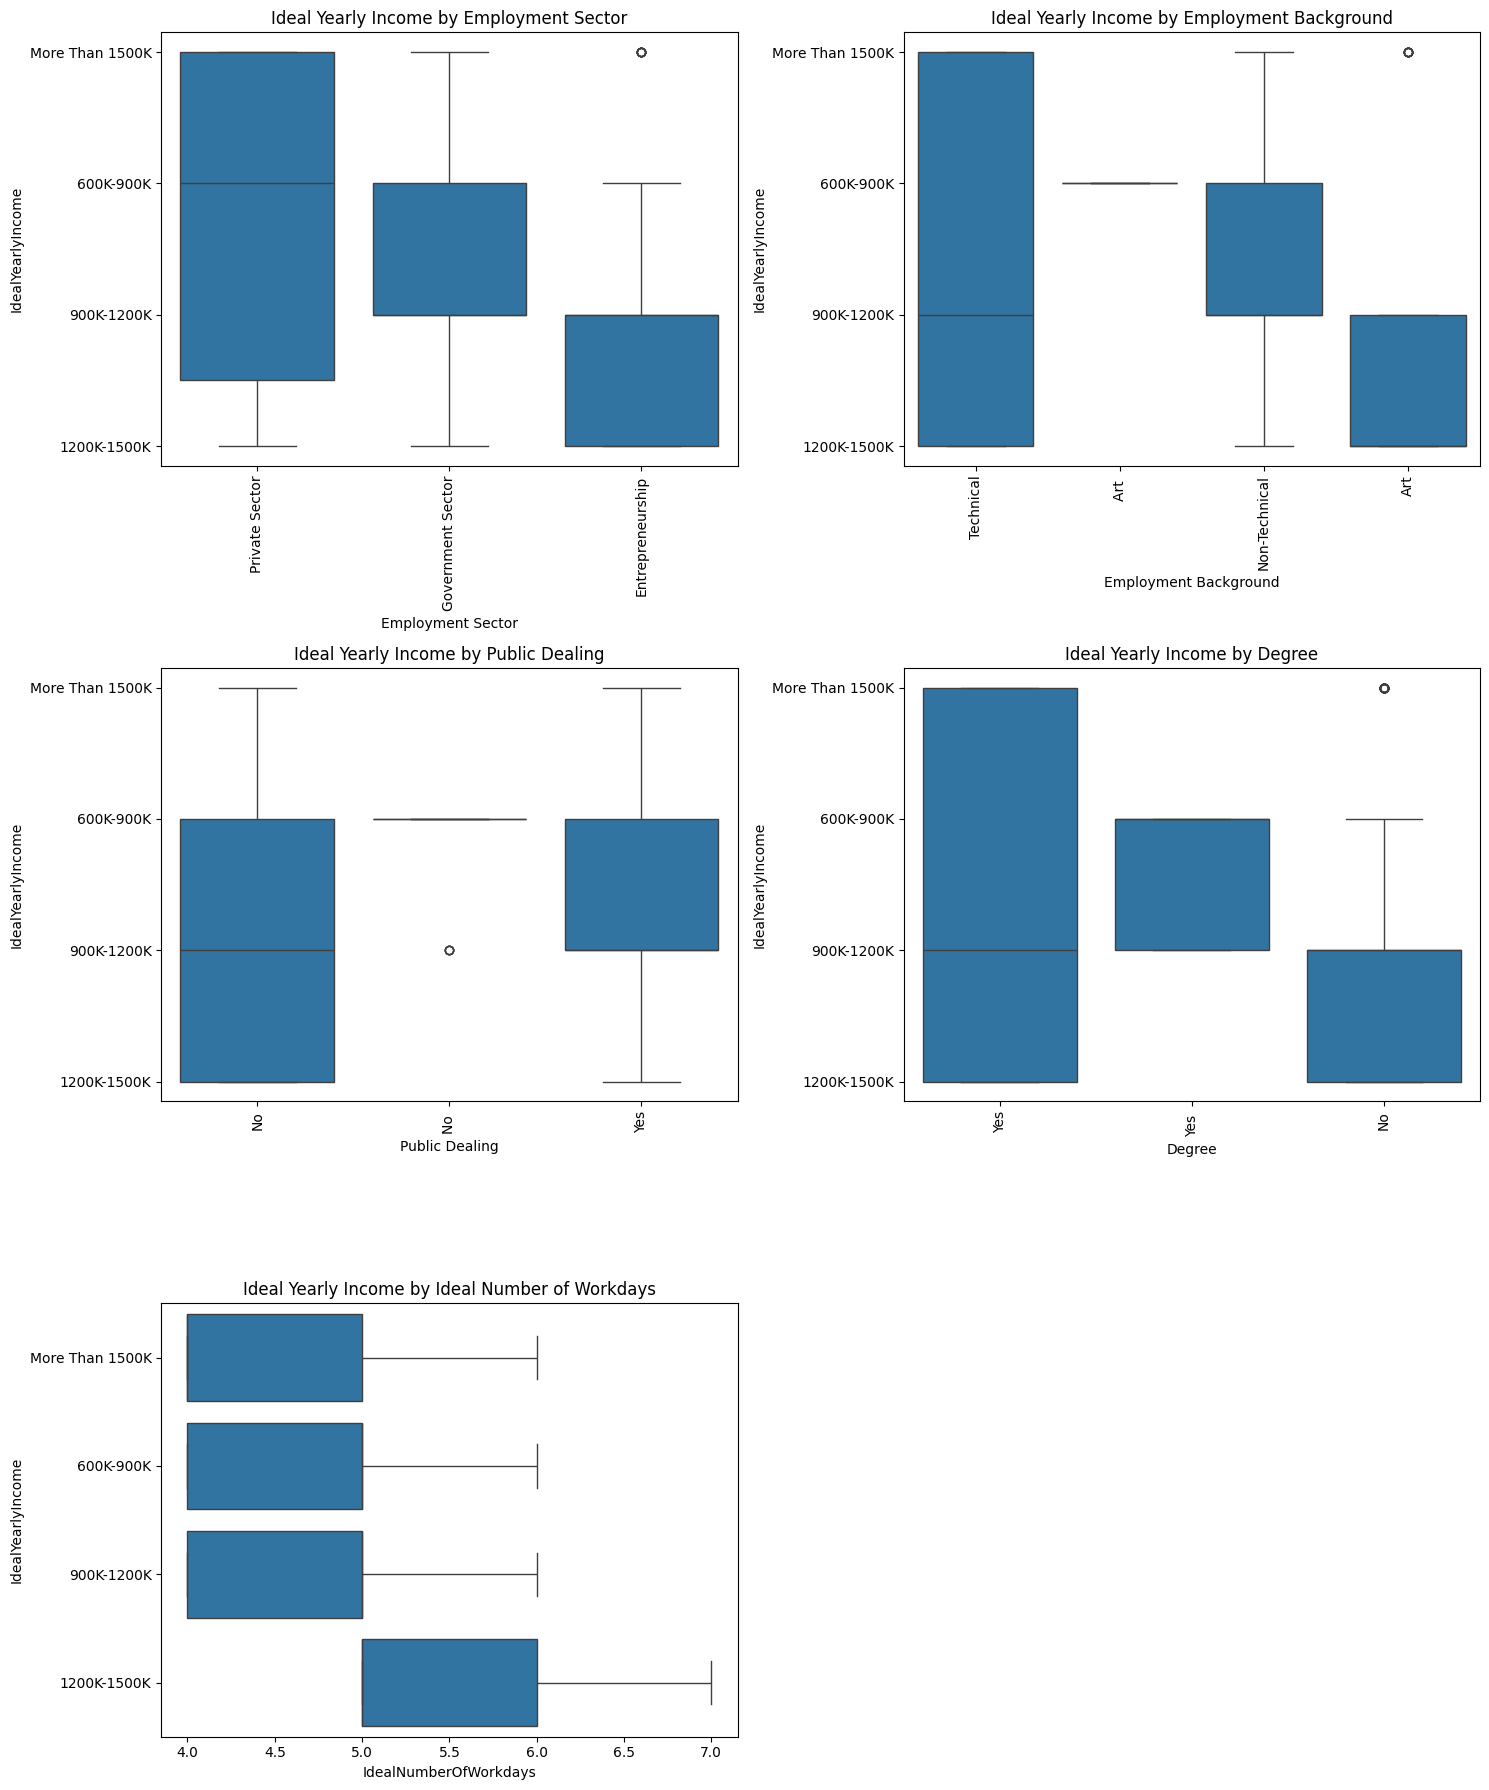

In [20]:
# Создаем фигуру и оси для графиков
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Создаем графики зависимости переменных от целевой переменной
sns.boxplot(x='Employment Sector', y='IdealYearlyIncome', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Ideal Yearly Income by Employment Sector')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.boxplot(x='Employment Background', y='IdealYearlyIncome', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Ideal Yearly Income by Employment Background')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.boxplot(x='Public Dealing', y='IdealYearlyIncome', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Ideal Yearly Income by Public Dealing')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.boxplot(x='Degree', y='IdealYearlyIncome', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Ideal Yearly Income by Degree')
axes[1, 1].tick_params(axis='x', rotation=90)

sns.boxplot(x='IdealNumberOfWorkdays', y='IdealYearlyIncome', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Ideal Yearly Income by Ideal Number of Workdays')

# Отключаем пустую ось
axes[2, 1].axis('off')

# Настраиваем отображение графиков
plt.tight_layout()
plt.show()